In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


# 1. Data Preprocessing

In [131]:
df=pd.read_excel('Online Retail.xlsx')

In [132]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [133]:
df.rename(columns={'InvoiceNo':'Transaction_ID','InvoiceDate':'Date','CustomerID':'Customer_ID','StockCode':'Product_Category','Quantity':'Units_Purchased','UnitPrice':'Amount_Spent','Country':'Region'},inplace=True)

In [134]:
df['Product_Category']=np.random.choice(['Electronics','Clothing','Home Decor','Books',
                                         'Groceries','Pet Supplies',
                                         'Jewelry','Accessories'],size=len(df))

df['Payment_Type']=np.random.choice(['Credit Card','Debt Card','Cash','PayPal','InstaPay'],size=len(df))

In [135]:
df.head()

,Transaction_ID,Product_Category,Description,Units_Purchased,Date,Amount_Spent,Customer_ID,Region,Payment_Type
0,536365,Groceries,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,InstaPay
1,536365,Jewelry,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Debt Card
2,536365,Electronics,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Debt Card
3,536365,Electronics,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,PayPal
4,536365,Jewelry,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Cash


In [136]:
df.shape

(541909, 9)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    541909 non-null  object        
 1   Product_Category  541909 non-null  object        
 2   Description       540455 non-null  object        
 3   Units_Purchased   541909 non-null  int64         
 4   Date              541909 non-null  datetime64[ns]
 5   Amount_Spent      541909 non-null  float64       
 6   Customer_ID       406829 non-null  float64       
 7   Region            541909 non-null  object        
 8   Payment_Type      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [138]:
#Convert the 'Date' column to datetime format.
df['Date']=pd.to_datetime(df['Date'])

In [139]:
#Check for missing values.
df.isnull().sum()

,0
Transaction_ID,0
Product_Category,0
Description,1454
Units_Purchased,0
Date,0
Amount_Spent,0
Customer_ID,135080
Region,0
Payment_Type,0


In [140]:
#dropping missing values.
df.dropna(inplace=True)

In [141]:
df.shape

(406829, 9)

In [142]:
#checking duplicate transactions.
print(df.duplicated(subset='Transaction_ID').sum())

384639


In [143]:
#Remove duplicate transactions.
df.drop_duplicates(subset='Transaction_ID',inplace=True)

In [144]:
df.shape

(22190, 9)

In [145]:
#Extract year, month, and weekday from the 'Date' column
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Weekday']=df['Date'].dt.day_name()
df['Hour']=df['Date'].dt.hour

In [21]:
#df.drop(columns='Date',inplace=True)

# 2. Data Analysis Using NumPy & Pandas

In [146]:
df.describe()
#Noticed: Units_Purchased less than 0

,Units_Purchased,Date,Amount_Spent,Customer_ID,Year,Month
count,22190.000000,22190,22190.000000,22190.000000,22190.000000,22190.000000
mean,22.862506,2011-06-29 19:05:51.404236288,11.985803,15238.498738,2010.923028,7.383912
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,2010.000000,1.000000
25%,1.000000,2011-03-29 08:52:15,1.250000,13755.000000,2011.000000,5.000000
50%,6.000000,2011-07-08 13:24:30,2.100000,15136.000000,2011.000000,8.000000
75%,14.000000,2011-10-10 17:23:30,4.950000,16746.000000,2011.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011.000000,12.000000
std,1053.686538,NaN,293.318277,1733.149624,0.266552,3.449725


In [147]:
#handling Negative Units
df['Units_Purchased']=df['Units_Purchased'].apply(lambda x:x*-1 if x<0 else x)

In [148]:
df.describe()

,Units_Purchased,Date,Amount_Spent,Customer_ID,Year,Month
count,22190.000000,22190,22190.000000,22190.000000,22190.000000,22190.000000
mean,41.436278,2011-06-29 19:05:51.404236288,11.985803,15238.498738,2010.923028,7.383912
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,2010.000000,1.000000
25%,2.000000,2011-03-29 08:52:15,1.250000,13755.000000,2011.000000,5.000000
50%,6.000000,2011-07-08 13:24:30,2.100000,15136.000000,2011.000000,8.000000
75%,16.000000,2011-10-10 17:23:30,4.950000,16746.000000,2011.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011.000000,12.000000
std,1053.119649,NaN,293.318277,1733.149624,0.266552,3.449725


In [149]:
df.columns

Index(['Transaction_ID', 'Product_Category', 'Description', 'Units_Purchased',
       'Date', 'Amount_Spent', 'Customer_ID', 'Region', 'Payment_Type', 'Year',
       'Month', 'Weekday'],
      dtype='object')

In [150]:
#Calculate total revenue and average transaction value.
df['Total_Revenue']=df['Units_Purchased']*df['Amount_Spent']

In [151]:
#Calculate total revenue.
print(df['Total_Revenue'].sum())

1751476.6700000002


In [152]:
#Calculate average transaction.
print(df['Total_Revenue'].mean())

78.93089995493466


In [153]:
#Identify the top 3 most popular product categories.
df['Product_Category'].value_counts().head(3)

,count
Product_Category,
Pet Supplies,2875
Clothing,2841
Books,2783


In [154]:
#Determine the most frequently used payment type.
df['Payment_Type'].value_counts().head(1)

,count
Payment_Type,
Debt Card,4500


In [155]:
#Compute monthly sales growth rate.
df.groupby('Month')['Total_Revenue'].sum().pct_change()

,Total_Revenue
Month,
1,NaN
2,-0.732682
3,0.305900
4,0.091958
5,0.475069
6,0.303353
7,-0.462446
8,-0.152127
9,0.479311


In [156]:
#Identify the top 5 highest spending customers.
df.groupby('Customer_ID')['Total_Revenue'].sum().head()

,Total_Revenue
Customer_ID,
12346.0,154367.20
12347.0,163.16
12348.0,331.36
12349.0,15.00
12350.0,25.20


In [157]:
#Determine the busiest sales day of the week.
df['Weekday'].value_counts().head(1)

,count
Weekday,
Thursday,4978


# 3. Advanced Data Visualization

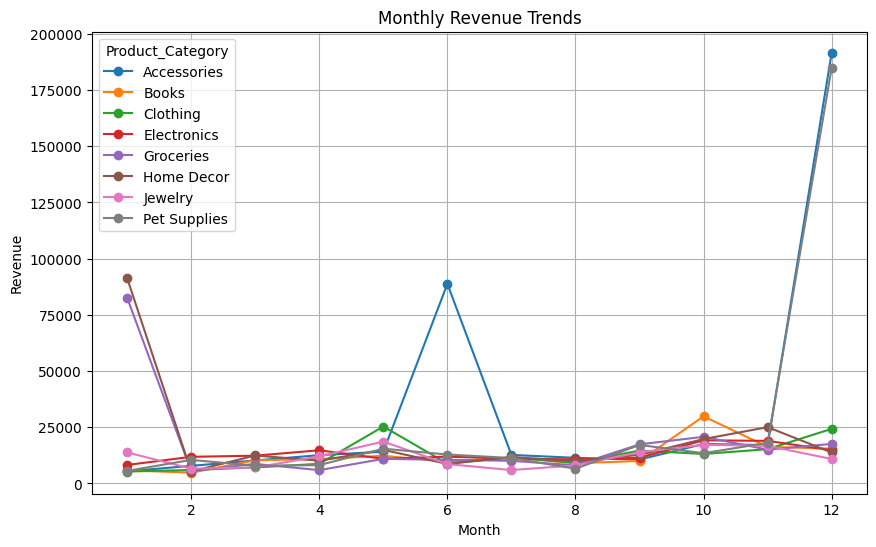

In [158]:
#Line Chart: Display monthly revenue trends for each product category.
data = df.pivot_table(index='Month', columns='Product_Category', values='Total_Revenue', aggfunc='sum')
data.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)

Text(0.5, 1.0, 'Sales by Payment Type')

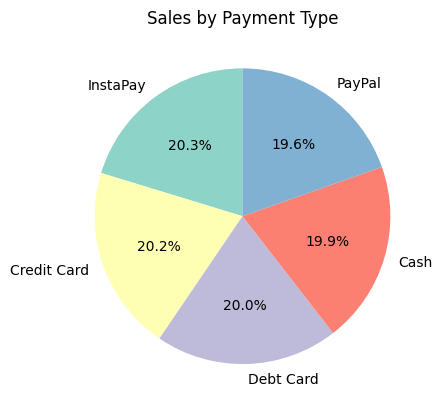

In [159]:
#Pie Chart: Show the distribution of sales by payment type.
plt.pie(df['Payment_Type'].value_counts(), labels=df['Payment_Type'].unique(), autopct='%1.1f%%',colors=plt.cm.Set3.colors, startangle=90)
plt.title('Sales by Payment Type')

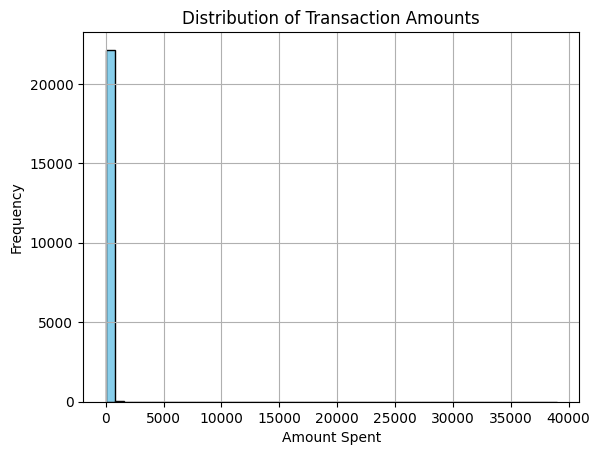

In [180]:
#Histogram: Illustrate the distribution of transaction amounts.
plt.hist(df['Amount_Spent'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.grid(True)

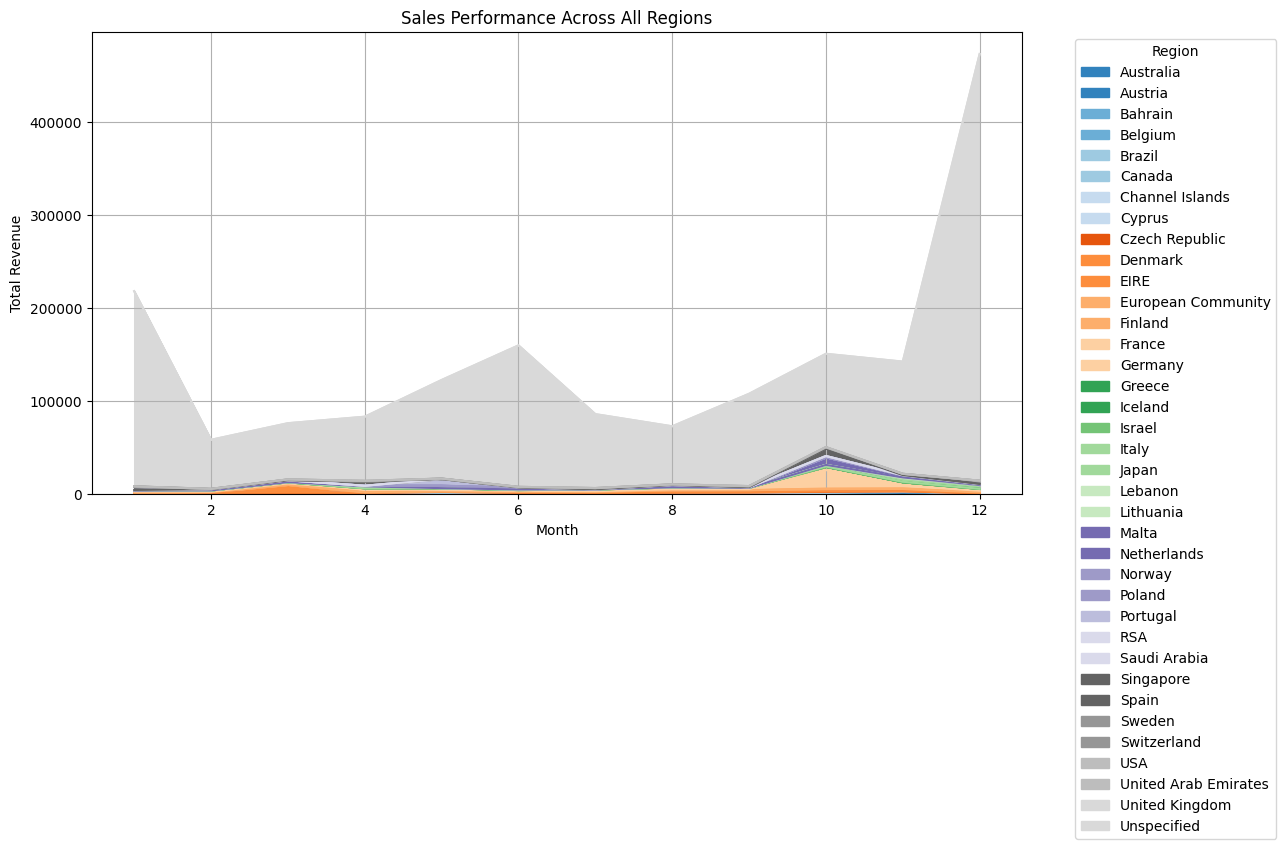

In [161]:
#Area Chart: Compare sales performance across different regions over time.
data = df.pivot_table(index='Month', columns='Region', values='Total_Revenue', aggfunc='sum').fillna(0)

data.plot(kind='area', figsize=(12,6), colormap='tab20c')

plt.title('Sales Performance Across All Regions')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Bonus Challenges

In [162]:
#Calculate customer retention rate based on repeat purchases.
retention_rate = (df[df.duplicated('Customer_ID', keep=False)]['Customer_ID'].nunique() / df['Customer_ID'].nunique()) * 100

print(retention_rate)

69.967978042086


In [163]:
#Compare average spending per region
df.groupby('Region')['Amount_Spent'].mean().sort_values(ascending=False)

,Amount_Spent
Region,
Singapore,1233.938000
Portugal,123.923286
Canada,92.950000
Norway,48.723000
Cyprus,37.555500
France,37.530109
Spain,31.997714
EIRE,31.764702
Channel Islands,21.425152


In [164]:
#Analyze the correlation between the number of units purchased and the total amount spent.
df[['Units_Purchased','Total_Revenue']].corr()


,Units_Purchased,Total_Revenue
Units_Purchased,1.000000,0.921304
Total_Revenue,0.921304,1.000000


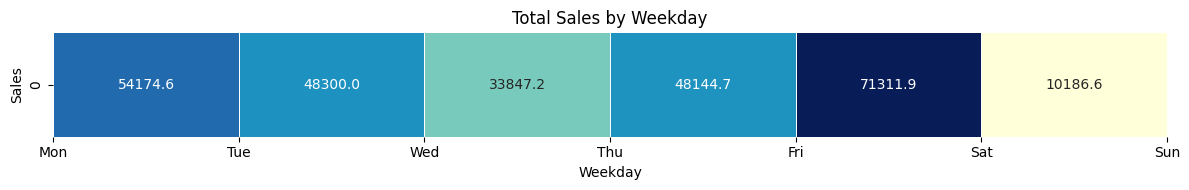

In [179]:
#Create a heatmap using Seaborn to show sales trends by weekday and hour.
sales_by_weekday = df.groupby('Weekday')['Amount_Spent'].sum()

plt.figure(figsize=(12, 2))
sns.heatmap([sales_by_weekday.values], cmap='YlGnBu', annot=True, fmt='.1f', cbar=False, linewidths=0.5)

plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.tight_layout()
